In [4]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [6]:
## 7.1 读取标准化后的数据
adata = sc.read("anndata_normalization.h5ad")
# print(adata.X.max(), adata.layers["log1p_norm"].max(), sep="\n")
print(adata.X.max(), adata.layers["scran_normalization"].max(), sep="\n")

8057.0
10.331907621839358


In [7]:
adata.raw = adata.copy()
## TODO:这次没有counts
adata.layers["counts"] = adata.X.copy()
# adata = adata[adata.obs["sample"] != "diab7", :]

我们将深度归一化和平方根变换后的数据版本保存到adata.layers['sqrt_norm']，以便我们稍后可以使用它们绘制归一化计数。有关为什么在这里使用平方根变换的更多背景信息，请参阅Wagner (2020)。

In [8]:
import numpy as np

adata.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata, inplace=False)["X"]
)

normalizing counts per cell


    finished (0:00:00)


In [9]:
adata

AnnData object with n_obs × n_vars = 100484 × 17269
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_

In [10]:
## 7.2 取高变基因
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat",  # seurat_v3:期望原始counts
    n_top_genes=2000,  # 500 - 5000，根据7.2.1看6000时均匀些
    layer="scran_normalization",  # 这里可以试试soupX_counts
    batch_key="batch",
    subset=False,  # 取子集后anndata中只有1000个基因,普通去批次只用hvg
)
"""会发现新增了额外的列
    - highly_variable_nbatches- 发现每个基因高度可变的批次数量
    - highly_variable_intersection- 每个基因在每批中是否存在很大差异
    - highly_variable- 合并每批结果后是否将每个基因选择为高度可变
"""
# adata_batch.var
# # 识别高变基因的方法
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5,batch_key="batch")
# sc.pp.highly_variable_genes(adata, n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    Gene indices [430, 7351] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7501488798957139
    Gene indices [15523] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7558983035594774


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8042183529729932


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7887983077079629


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [423] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7558702906863572
    Gene indices [433] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7392944228061672


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8112096763767694


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [11579] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8123885881314911
    Gene indices [1633] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7451944910777178


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1618] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7722021361052848


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7842677778504142


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8960583275079849
    Gene indices [5828] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8960912154403479


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5905] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7017296445178399


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5834] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8087946492765854
    Gene indices [3203] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8692572115366757


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5817, 14589] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.9258623656806819


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1590, 5995] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8564151150360965


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8084976738913336


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1512] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7372610024202796
    Gene indices [13768] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8344078438349306


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1472] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7948572227445866


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1486] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.6966407116469195


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1617, 15374] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7697148390390057
    Gene indices [6209] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.8047112351794372


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [6001] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.6797300307732768


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5904] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.6936589697719806


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5955, 14974] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.6660161602621253
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.6575255021210044


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1598, 6021] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7152843057505945


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [1587, 6013] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7453808378997567


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    Gene indices [5834, 8933] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.763247804780433
    Gene indices [5844] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    the 2000 top genes correspond to a normalized dispersion cutoff of 0.7169952329232125
    finished (0:00:30)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x780b101c2ca0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby("gene").agg(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x780b101c2ca0> is currently usi

'会发现新增了额外的列\n    - highly_variable_nbatches- 发现每个基因高度可变的批次数量\n    - highly_variable_intersection- 每个基因在每批中是否存在很大差异\n    - highly_variable- 合并每批结果后是否将每个基因选择为高度可变\n'

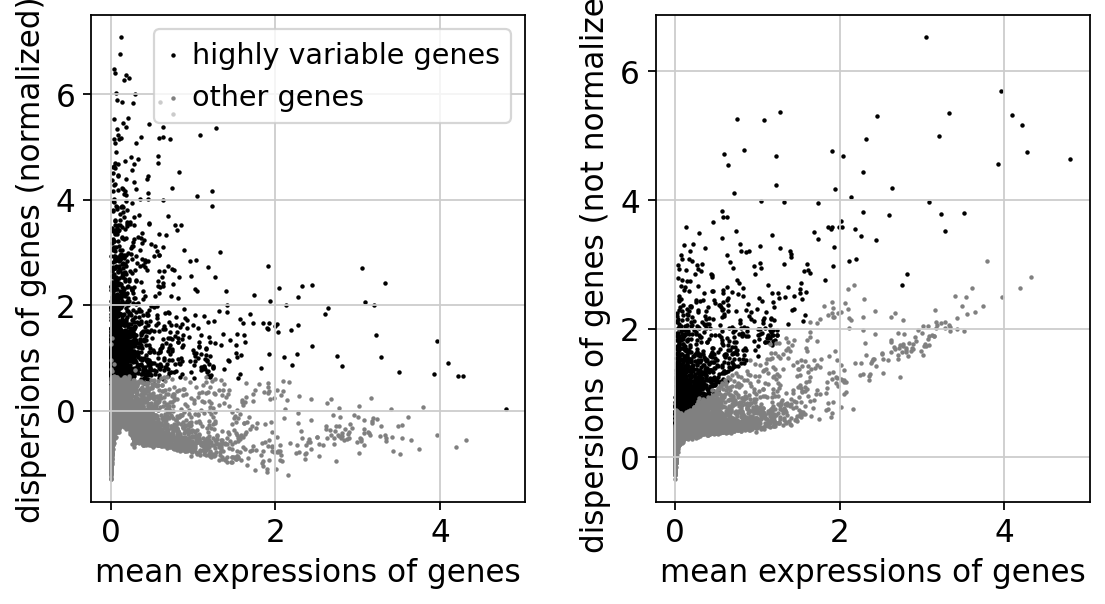

In [11]:
sc.pl.highly_variable_genes(adata)

In [12]:
# 小鼠
# markers = [
#     # "Stat3",
#     "Arg1",
#     "Itgb2",  # "CD11b",
#     "Ly6g",
#     "Ly6c1",
#     "Ly6c2",
# ]
# 大鼠
markers = [
"Cd3",    # T细胞标志
"Cd4",    # helper T细胞标志
"Cd8",    # 细胞毒性T细胞标志
"Cd19",   # B细胞标志
"Cd11b",  # 单核细胞/巨噬细胞标志
"Cd11c",  # 树突状细胞标志
"Cd16",   # 自然杀伤细胞标志
"Cd56",   # 自然杀伤细胞标志
"Foxp3",  # 调节性T细胞标志
"Cd25",   # 活化T细胞和调节性T细胞标志
"Cd127",  # 记忆T细胞标志
"Cd45R",  # B细胞标志
"Cd68",   # 巨噬细胞标志
"F4/80",  # 小鼠/大鼠巨噬细胞标志
"Ly6G",   # 嗜中性粒细胞标志
]
# 人
# markers = [
#     "CD33",
#     "ITGB2",
#     "FUT4",
#     "CEACAM8",
#     "CD14",
#     "HLA-DRA",
#     "HLA-DRB5",
#     "HLA-DRB1",
# ]

In [13]:
# # 皮尔逊残差高变基因
# sc.experimental.pp.highly_variable_genes(
#     adata, flavor="pearson_residuals", n_top_genes=3000, batch_key="batch"
# )

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt


# # 假设 adata, markers 已经定义

# fig, ax = plt.subplots(figsize=(6, 6))  # 改为单个图形的大小

# hvgs = adata.var["highly_variable"]

# # 绘制所有基因
# ax.scatter(
#     adata.var["mean_counts"], adata.var["residual_variances"], s=3, edgecolor="none"
# )
# # 绘制高变异基因
# ax.scatter(
#     adata.var["mean_counts"][hvgs],
#     adata.var["residual_variances"][hvgs],
#     c="tab:red",
#     label="selected genes",
#     s=3,
#     edgecolor="none",
# )
# # 绘制已知标记基因
# ax.scatter(
#     adata.var["mean_counts"][np.isin(adata.var_names, markers)],
#     adata.var["residual_variances"][np.isin(adata.var_names, markers)],
#     c="k",
#     label="known marker genes",
#     s=10,
#     edgecolor="none",
# )
# # 在每个标记基因上添加文本标注
# for marker in markers:
#     # 获取基因的索引
#     marker_index = np.where(adata.var_names == marker)[0][0]
#     # 获取基因的均值和残差方差
#     mean_count = adata.var["mean_counts"][marker_index]
#     residual_variance = adata.var["residual_variances"][marker_index]
#     # 在图上为标记基因添加文本标注
#     # ax.text(mean_count, residual_variance, marker, fontsize=9)
#     # 在图上为标记基因添加文本标注，加白色背景
#     ax.text(
#         mean_count,
#         residual_variance,
#         marker,
#         fontsize=9,
#         bbox=dict(
#             facecolor="white", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.2"
#         ),
#     )

# ax.set_xscale("log")
# ax.set_xlabel("mean expression")
# ax.set_yscale("log")
# ax.set_ylabel("residual variance")
# ax.set_title("gene expression vs. residual variance")

# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.yaxis.set_ticks_position("left")
# ax.xaxis.set_ticks_position("bottom")

# plt.legend()
# plt.savefig("./figures/04-高变基因中的marker.pdf")
# plt.show()

In [15]:
markers = [marker for marker in markers if marker in adata.var_names]
# 检查每个基因是否为高变基因
is_hvg_array = adata.var.loc[markers, "highly_variable"]
# 打印结果
for gene, is_hvg in zip(markers, is_hvg_array):
    print(
    f"{gene} is {'a highly variable gene' if is_hvg else 'not a highly variable gene'}"
    )

Cd4 is a highly variable gene
Cd19 is a highly variable gene
Foxp3 is a highly variable gene
Cd68 is a highly variable gene


In [16]:
adata = adata[:, adata.var["highly_variable"]]
adata

View of AnnData object with n_obs × n_vars = 100484 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 

computing PCA
    on highly variable genes
    with n_comps=50


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:10)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


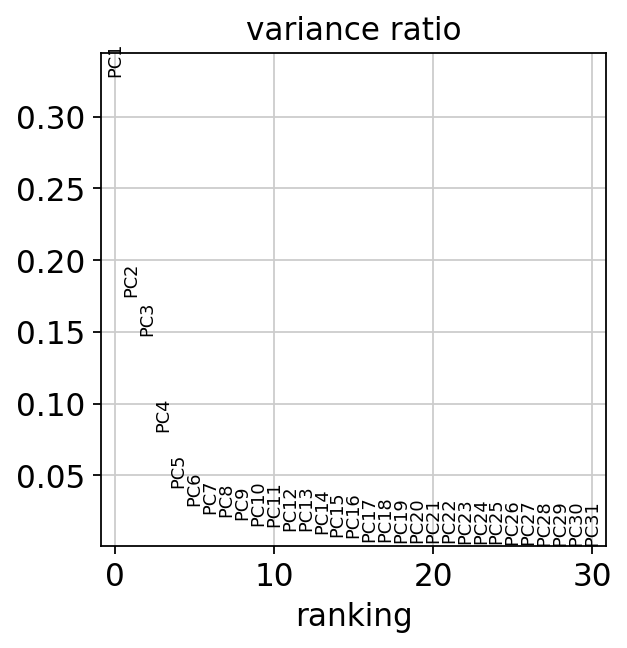

In [17]:
sc.pp.pca(
    adata,
    n_comps=50,
    use_highly_variable=True,
    random_state=123,
)
sc.pl.pca_variance_ratio(adata)

## 预览


In [18]:
sc.pp.neighbors(
    adata,
    n_neighbors=15,
    n_pcs=4,
    random_state=123,
)
sc.tl.umap(adata, min_dist=0.3, random_state=123)

computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 4
    computed neighbors (0:00:23)
    computed connectivities (0:00:06)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:46)


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(c

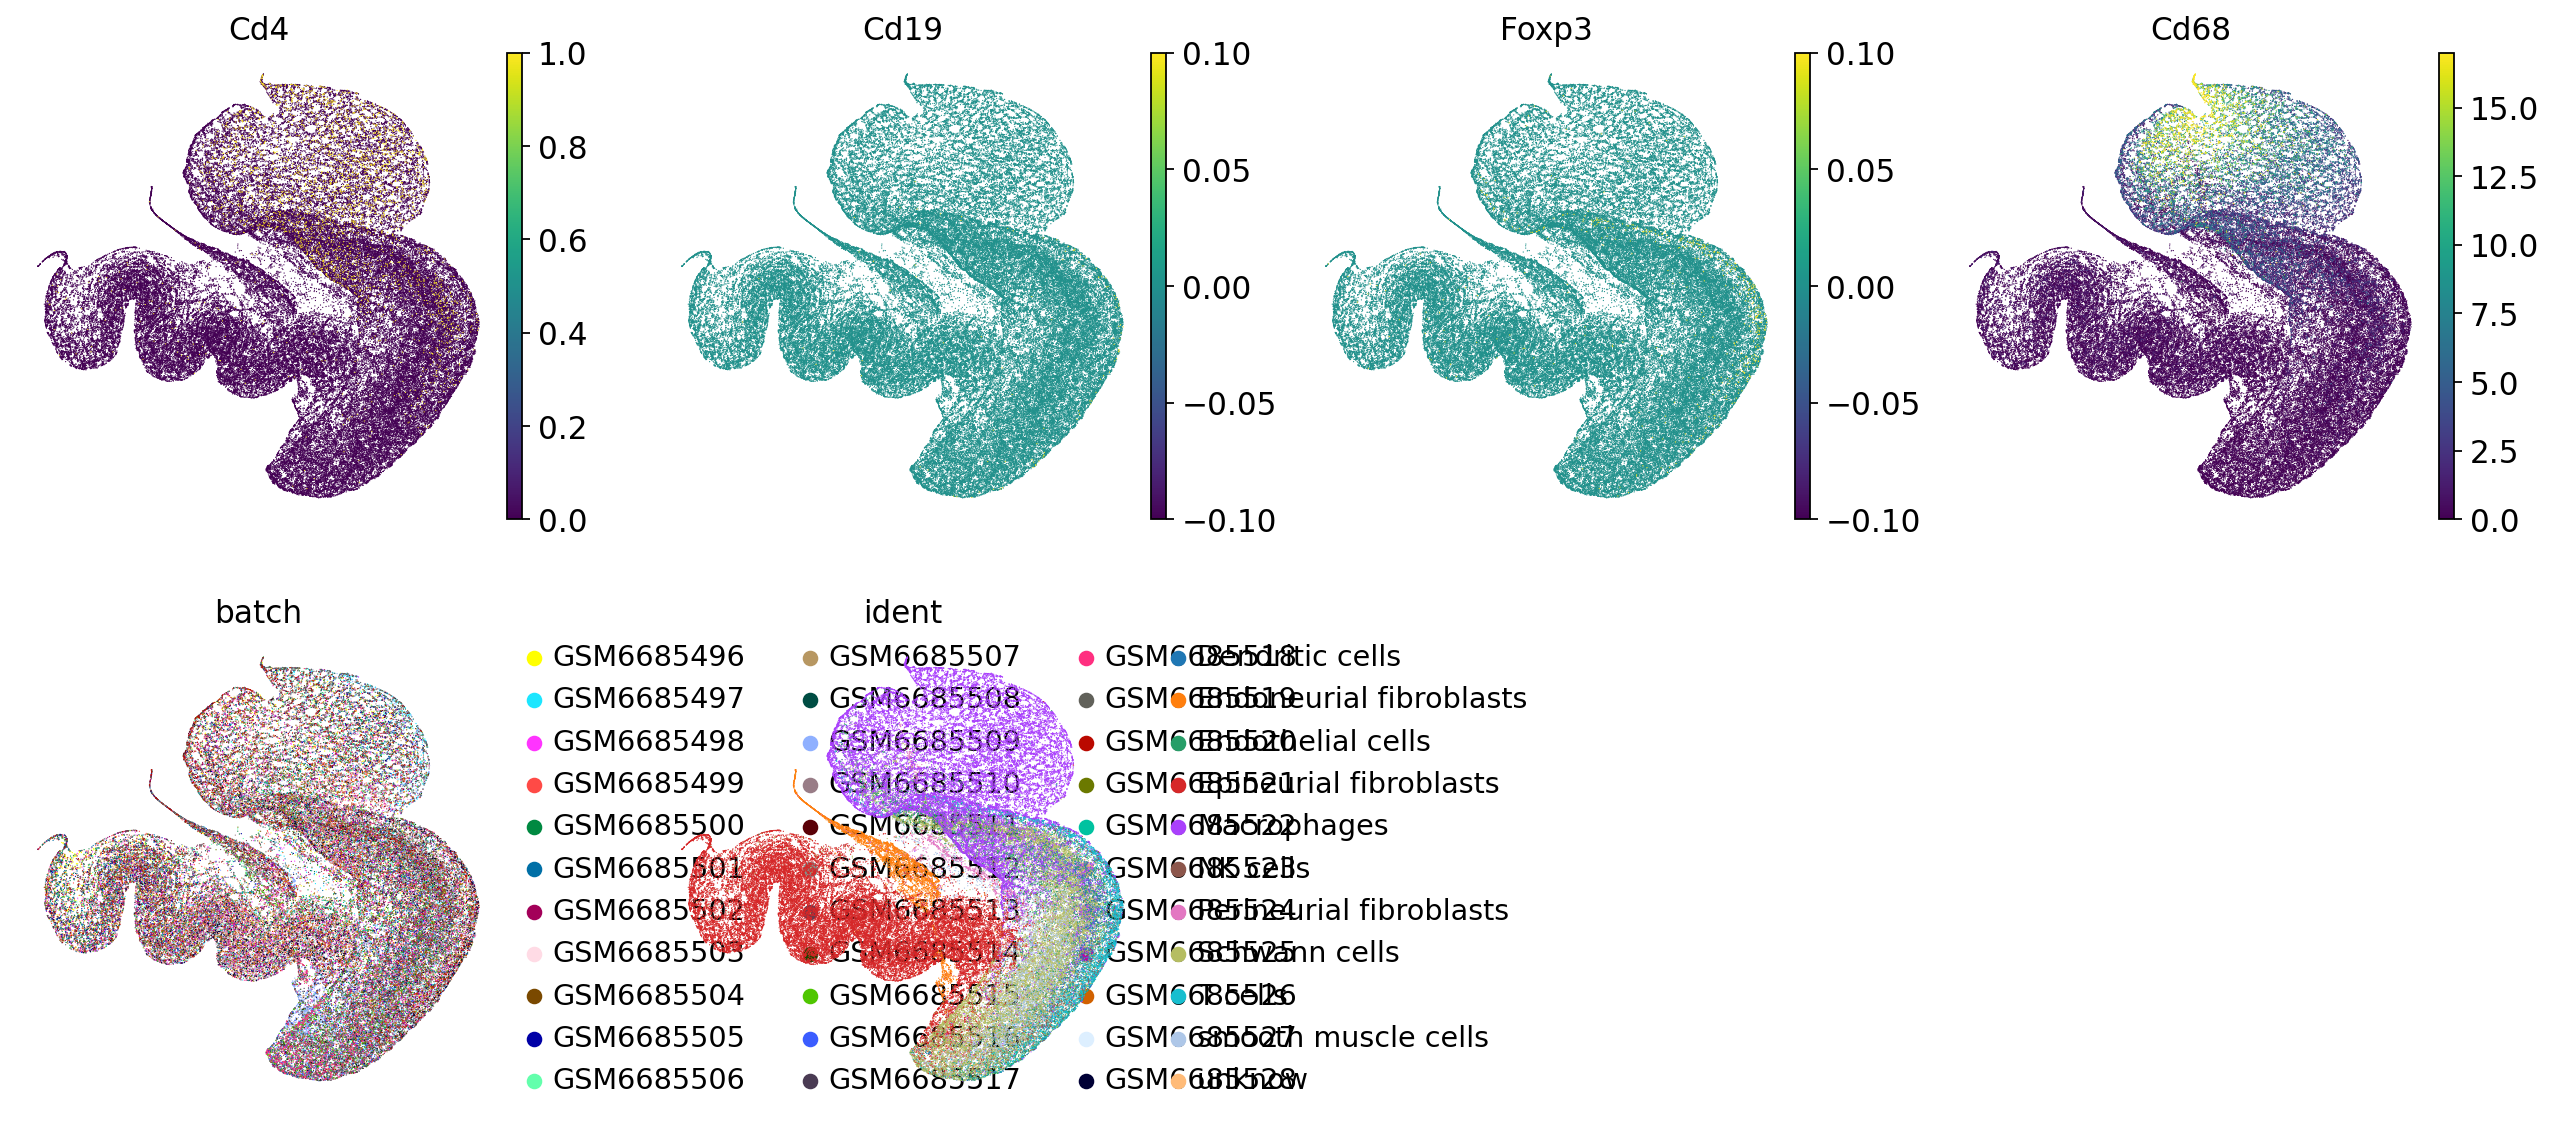

In [19]:
sc.pl.umap(
    adata,
    color=markers + ["batch"] + ["ident"],
    vmin=0,
    vmax="p99",
    save="_marker速览.pdf",
    # layer="sqrt_norm",
)

In [20]:
adata.write("anndata_highly.h5ad")